<a href="https://colab.research.google.com/github/FelixEbenezer/Deep-Learning-TensorFlow-Hub/blob/main/TensorFlow_Hub_Transfer%C3%AAncia_de_Estilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Hub - Transferência de Estilo

- Basedo em: https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization?hl=pt-br
- Paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

# Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('Versão do TensorFlow: ', tf.__version__)
print('Versão do TensorFlow Hub: ', hub.__version__)

Versão do TensorFlow:  2.8.2
Versão do TensorFlow Hub:  0.12.0


# Tratamento das imagens

In [ ]:
caminho_imagem_conteudo = '/content/san-francisco-g358392e87_1280.jpg'
caminho_imagem_estilo = '/content/style.jpg'

In [ ]:
def carrega_imagem(path, tamanho = (256, 256)):
  imagem_path = tf.keras.utils.get_file(path, path)
  #print(imagem_path)
  imagem = tf.io.decode_image(tf.io.read_file(imagem_path), channels = 3, dtype=tf.float32)[tf.newaxis, ...]
  #print(type(imagem), imagem.shape)
  imagem = tf.image.resize(imagem, tamanho, preserve_aspect_ratio = True)
  return imagem

In [ ]:
imagem_conteudo = carrega_imagem(caminho_imagem_conteudo, (384, 384))
imagem_estilo = carrega_imagem(caminho_imagem_estilo)

In [ ]:
imagem_conteudo.shape, imagem_estilo.shape

(TensorShape([1, 256, 384, 3]), TensorShape([1, 256, 252, 3]))

In [ ]:
def mostrar_imagens(imagens, titulos = []):
  numero_imagens = len(imagens)
  #print(numero_imagens)
  plt.figure(figsize = (12,12))
  gs = gridspec.GridSpec(1, numero_imagens)
  for i in range(numero_imagens):
    #print(i)
    plt.subplot(gs[i])
    plt.axis('off')
    plt.imshow(imagens[i][0])
    plt.title(titulos[i])

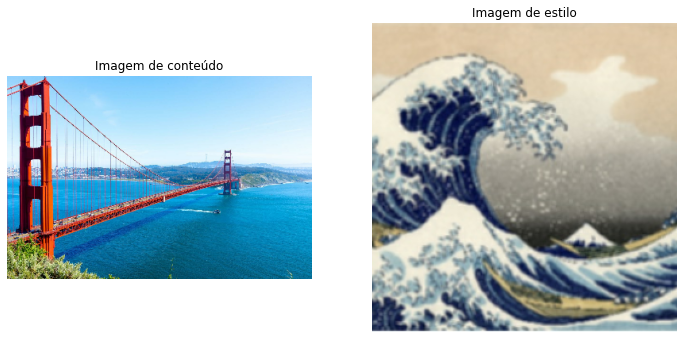

In [ ]:
mostrar_imagens([imagem_conteudo, imagem_estilo], ['Imagem de conteúdo', 'Imagem de estilo'])

# Transferência de estilo

In [ ]:
caminho_modelo = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
modelo = hub.load(caminho_modelo)

In [ ]:
resultados = modelo(tf.constant(imagem_conteudo), tf.constant(imagem_estilo))

In [ ]:
resultados

[<tf.Tensor: shape=(1, 256, 384, 3), dtype=float32, numpy=
 array([[[[0.83855736, 0.78800255, 0.6832507 ],
          [0.84071773, 0.78748584, 0.6842158 ],
          [0.8381871 , 0.78331375, 0.6801509 ],
          ...,
          [0.86960787, 0.8117144 , 0.62373555],
          [0.8757684 , 0.82773995, 0.61540806],
          [0.89839286, 0.8500602 , 0.657374  ]],
 
         [[0.8311599 , 0.7784854 , 0.6748269 ],
          [0.83413225, 0.7778945 , 0.6766881 ],
          [0.8315958 , 0.7743559 , 0.6729264 ],
          ...,
          [0.8739991 , 0.8158452 , 0.6303584 ],
          [0.8828916 , 0.8344412 , 0.627565  ],
          [0.9070664 , 0.8581821 , 0.67390364]],
 
         [[0.8224706 , 0.7696124 , 0.66677547],
          [0.82552785, 0.76983625, 0.66991806],
          [0.8240955 , 0.76713467, 0.6687783 ],
          ...,
          [0.87294227, 0.8144573 , 0.625919  ],
          [0.8807409 , 0.8295576 , 0.62221915],
          [0.9080261 , 0.85666656, 0.67372817]],
 
         ...,
 
       

In [ ]:
imagem_com_estilo = resultados[0]

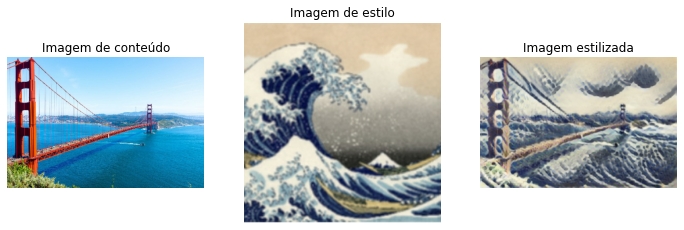

In [ ]:
mostrar_imagens([imagem_conteudo, imagem_estilo, imagem_com_estilo], ['Imagem de conteúdo', 'Imagem de estilo', 'Imagem estilizada'])